## Audio Deep Learning in Plain English
- So how do we feed an audio sample into a machine learning algorithm? You guessed right: we first convert it to an image. By visualizing an audio sample, we can loosely apply image processing techniques. At this point, we will take a useful detour to understand the intuition behind image classification using transformers.

### Image Processing
- Reading material to complete
    1. [read://https_medium.com/?url=https%3A%2F%2Fmedium.com%2F%40okezieowen%2Flets-build-a-mini-igbogpt-17e7290a368d](https://medium.com/@okezieowen/lets-build-a-mini-igbogpt-17e7290a368d)
    2. [read://https_medium.com/?url=https%3A%2F%2Fmedium.com%2F%40okezieowen%2Faudio-deep-learning-in-plain-english-b52843deb64e](https://medium.com/@okezieowen/audio-deep-learning-in-plain-english-b52843deb64e)
    3. [read://https_medium.com/?url=https%3A%2F%2Fmedium.com%2F%40ccibeekeoc42%2Fadvancing-multilingual-speech-recognition-fine-tuning-whisper-for-enhanced-low-resource-34529b525f90](https://medium.com/@ccibeekeoc42/advancing-multilingual-speech-recognition-fine-tuning-whisper-for-enhanced-low-resource-34529b525f90)

## 1. Reinforcement Learning Made Simple - Intro to Basic Concepts and Terminology

Now, starting with the first time-step, the following steps occur at each time-step:

1. The environment’s current state is input to the agent.
2. The agent uses that current state to decide what action it should take. It does not need a memory of the full history of states and actions that came before it. The agent decides to place its token in some position. There are many possible actions to choose from, so how does it decide what action to take? It’s a very important question but we’ll come to that later.
3. That action is passed as input to the environment.
4. The environment uses the current state and the selected action and outputs two things — it transitions the world to the next state, and it provides some reward. For instance, it takes the next move by placing its token in some position and provides us a reward. In this case, since no one has won the game yet, it provides a neutral reward of 0 points. How the environment does this is opaque to the agent, and not in our control.
5. This reward from the environment is then provided as feedback to the agent as a consequence of the previous action. This completes one time-step and moves us to the next time-step. This next state now becomes the current state which is then provided to the agent as input, and the cycle repeats.

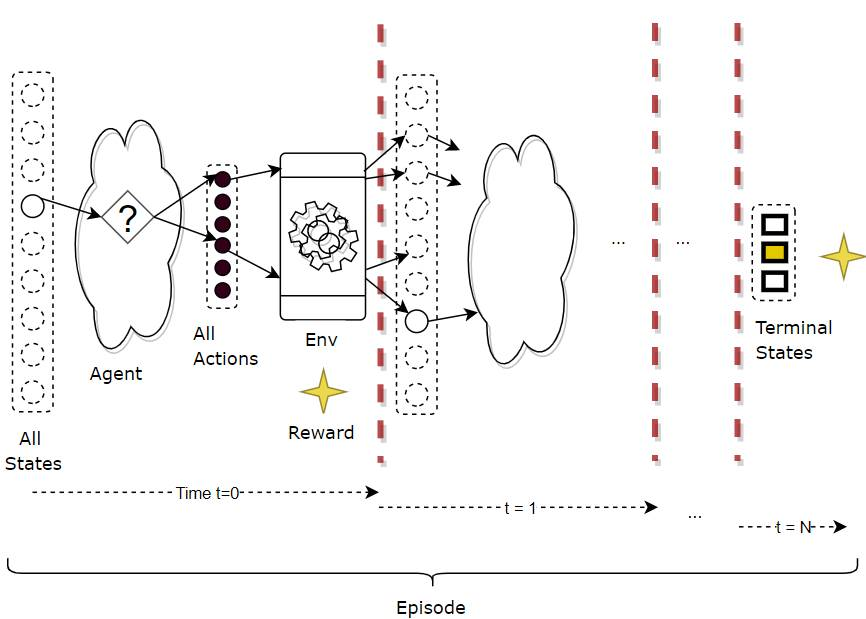

### How does the environment transition to the next state?
For most realistic RL problems that we will deal with, the answer will usually be that ‘it just does’. Most environments have complex internal dynamics that control how they behave when an action is taken from a particular state.

For instance, in a stock-trading RL application, the stock market environment has a range of unseen factors that determine how stock prices move. Or the environment in a drone navigation RL application depends on the laws of physics that control air flows, motion, thermodynamics, visibility and so on in a variety of terrains and micro-weather conditions.
- if we did build such an environment model, an MDP would represent it as a large transition probability matrix or function.

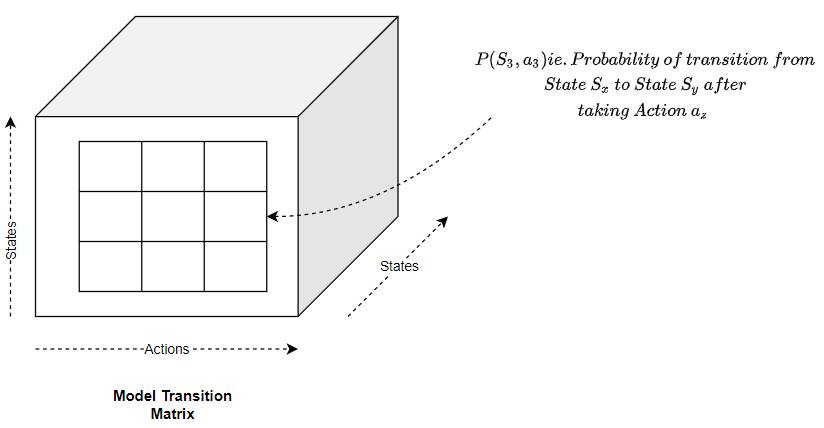

### How does the Agent pick the action?
- Return: The Return is the total reward over all time-steps -> Return is computed using Discounted Rewards -> Rewards that give us the highest Total Returns are better
- Policy: Policy is the strategy followed to pick an action -> Any strategy that the agent follows to decide which action to pick in a given state, is called a Policy. -> Policy is like a (huge) Lookup Table which maps a state to an action. the agent’s goal is to follow a Policy (which is how it picks its actions) that maximizes its Return.

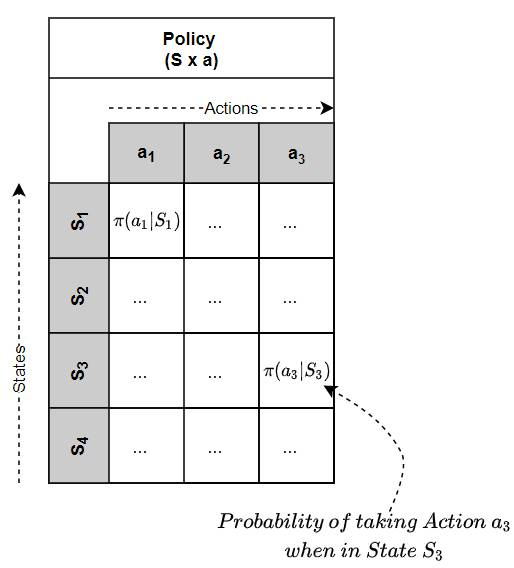

1. Deterministic: A Deterministic Policy is a Policy where the agent always chooses the same fixed action when it reaches a particular state.
2. Stochastic Policies: Stochastic Policy is a Policy where the agent varies the actions it chooses for a state, based on some probability for each action.
- Value: The Value tells you the expected Return by following some Policy
1. State Value — the expected Return from a given state, by executing actions based on a given policy π from that state onward. In other words, the State Value function maps a State to its Value.
2. State-Action Value (aka Q-Value) — the expected Return by taking a given action from a given state, and then, by executing actions based on a given policy π after that. In other words, the State-Action Value function maps a State-Action pair to its Value.

### Use the Value Function to compare Policies
Given two policies, we can determine the corresponding State-Value or State-Action Value functions for each of those policies, by following the policy and evaluating the Returns.

### RL Solution Categories
‘Solving’ a Reinforcement Learning problem basically amounts to finding the Optimal Policy (or Optimal Value). There are many algorithms, which we can group into different categories.
1. Model-based (aka Planning) -> Model-based approaches are used when the internal operation of the environment is known. In other words, we can reliably say what Next State and Reward will be output by the environment when some Action is performed from some Current State.

2. Model-free (aka Reinforcement Learning) -> Model-free approaches are used when the environment is very complex and its internal dynamics are not known. They treat the environment as a black-box.

Most practical problems are Control problems, as our goal is to find the Optimal Policy.

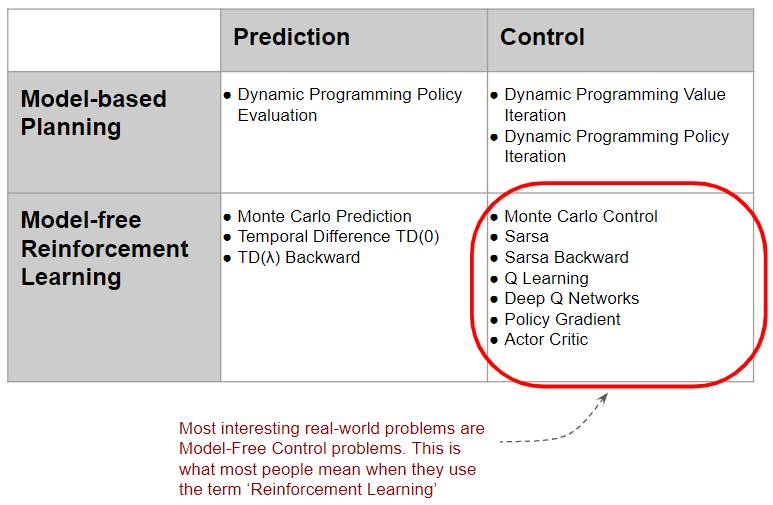

#### Model-based Approaches
Because they can produce the exact outcome of every state and action interaction, model-based approaches can find a solution analytically without actually interacting with the environment.

As an example, with a model-based approach to play chess, you would program in all the rules and strategies of the game of chess.

#### Model-free Approaches
Model-free solutions, by contrast, are able to observe the environment’s behavior only by actually interacting with it. Since the internal operation of the environment is invisible to us, how does the model-free algorithm observe the environment’s behavior?

We learn how it behaves by interacting with it, one action at a time. The algorithm acts as the agent, takes an action, observes the next state and reward, and repeats.

As the agent takes each step, it follows a path (ie. trajectory).

The agent’s trajectory becomes the algorithm’s ‘training data’.

### The Bellman Equation is the foundation for all RL algorithms
#### Work back from a Terminal State (makes it easier to understand)
The return from that state is the same as the reward obtained by taking that action. Remember that Reward is obtained for a single action, while Return is the cumulative discounted reward obtained from that state onward (till the end of the episode).

Now consider the previous state S6. The return from S6 is the reward obtained by taking the action to reach S7 plus any discounted return that we would obtain from S7. The important thing is that we no longer need to know the details of the individual steps taken beyond S7.

#### Bellman Equation for State Value
So State Value can be similarly decomposed into two parts — the immediate reward from the next action to reach the next state, plus the Discounted Value of that next state by following the policy for all subsequent steps.

#### Bellman Equation for State-Action Value

Similarly, the State-Action Value can be decomposed into two parts — the immediate reward from that action to reach the next state, plus the Discounted Value of that next state by following the policy for all subsequent steps.

#### Why is the Bellman Equation useful?
1. Return can be computed recursively without going to the end of the episode
2. We can work with estimates, rather than exact values

### Model-free algorithms can be Policy-based or Value-based
#### Use the Value function to compare two policies
every policy has two corresponding value functions, the State Value (or V-value), and the State-Action Value (or Q-value)

### Model-free Algorithm Categories
Simpler algorithms implement the Policy or Value as a Lookup Table, while the more advanced algorithms implement a Policy or Value function, using a Function Approximator like a Neural Network.

#### Model-free algorithms use an iterative solution
- All of these algorithms can be boiled down to a few essential principles that all of them employ.
- They start with arbitrary estimates of the quantity they want to find, and then incrementally improve those estimates by getting data from the environment.

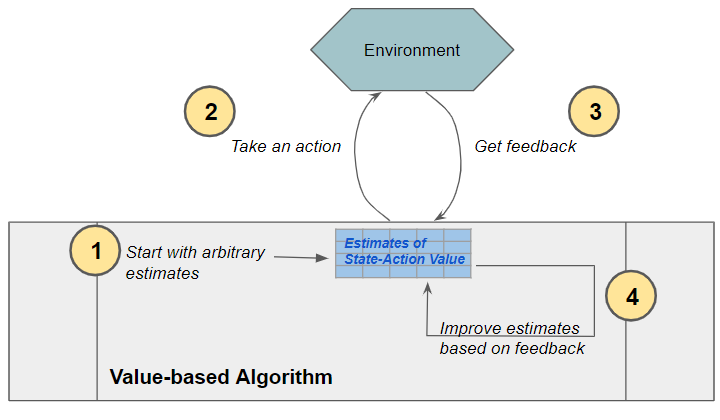

1. Initialize estimates
The first step is the Initialization of our estimates. A Value-based algorithm uses an estimated Optimal State-Action Value table, while a Policy-based algorithm uses an estimated Optimal Policy table with probabilities for each action in each state. In the beginning, since it has no idea what the right values are, it simply initializes everything to zero.
2. Take an action
Next, the agent needs to pick an action to perform from the current state.

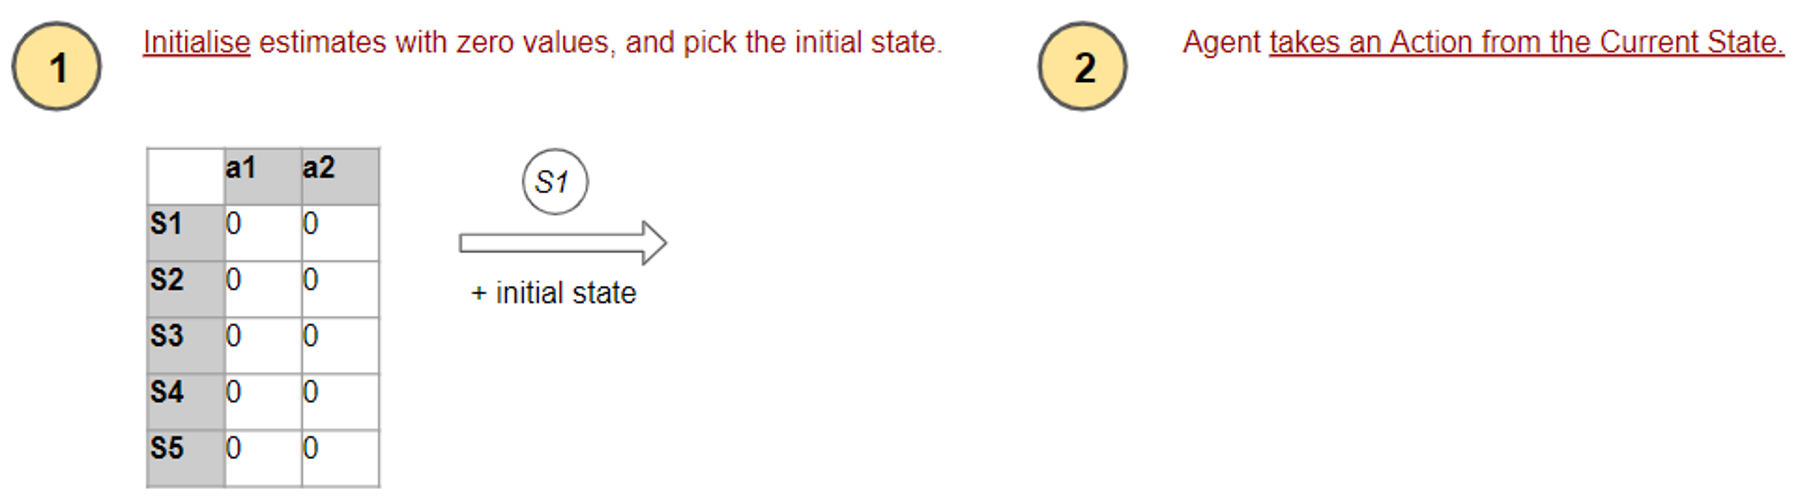

- Exploration vs Exploitation
Exploration — when we first start learning, we have no idea which actions are ‘good’ and which are ‘bad. So we go through a process of discovery where we randomly try different actions and observe the rewards.

Exploitation — on the other end of the spectrum, when the model is fully trained, we have already explored all possible actions, so we can pick the best actions which will yield the maximum return

#### Policy-based uses its own estimates to pick an action
A Policy-based agent’s Policy Table already has an ongoing estimate of the optimal policy, which tells you the desired probability of all the actions you can take from any given state. So it just picks an action based on the probabilities of that estimated optimal policy. The higher the probability of an action, the more likely it is to get picked.

#### Value-based uses an ε-greedy strategy to pick an action
A Value-based agent adopts a dynamic strategy known as ε-Greedy. It uses an exploration rate ε which it adjusts as training progresses to ensure more exploration in the early stages of training and shifts towards more exploitation in the later stages.
- Now, whenever it picks an action in every state, it selects a random action (ie. explores) with probability ε. Since ε is higher in the early stages, the agent is more likely to explore.
- And similarly, with probability ‘1 — ε’, it selects the best action (ie. exploit). As ε goes down, the likelihood of exploration becomes less and the agent becomes ‘greedy’ by exploiting the environment more and more.

3. Get feedback from the environment
The agent takes the action it has selected and obtains feedback from the environment.

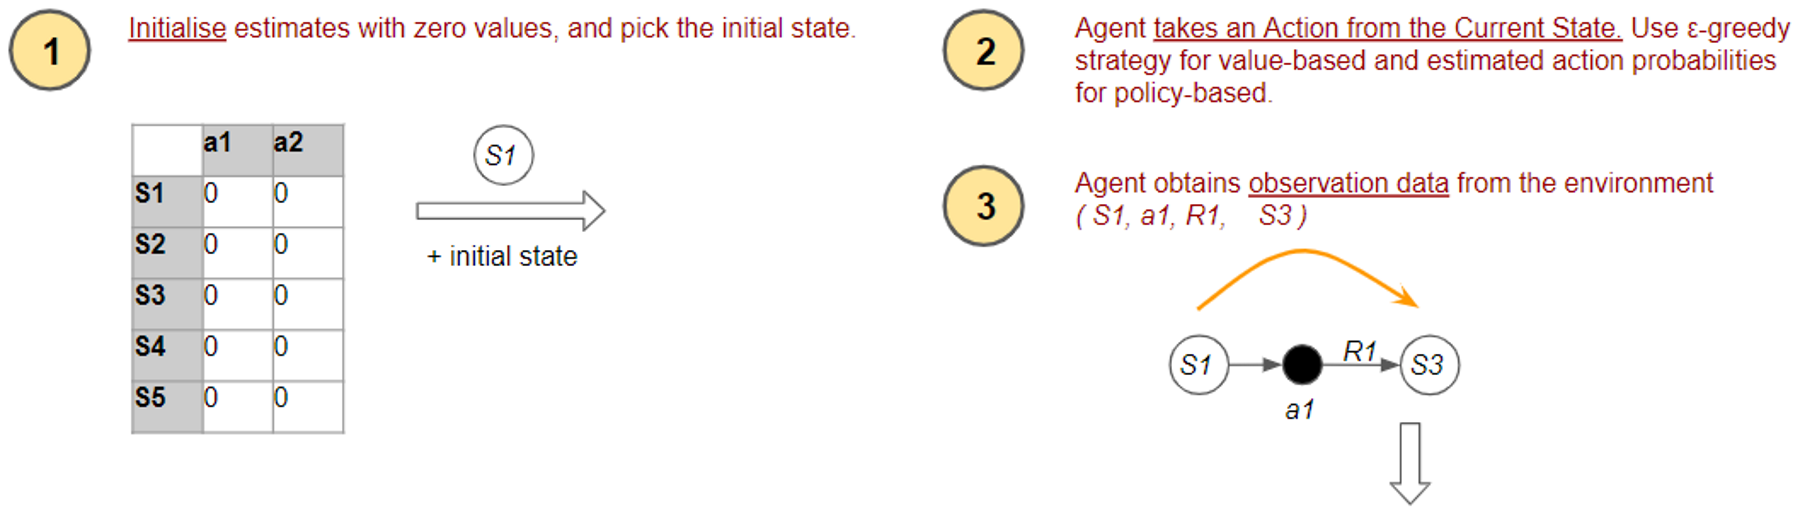

The agent receives feedback from the environment in the form of a reward.

4. Improve estimates
A Policy-based agent uses that feedback to improve its estimated Optimal Policy based on that reward. A Value-based agent uses that feedback to improve its estimated Optimal Value based on that reward. That way, the next time they have to decide which action to take from that state, that decision will be based on more accurate estimates.

    - Policy-based updates the probability of the action: The agent says ‘If I got a positive reward, then I will update my Policy table to increase the probability of the action I just took. That way, the next time I will be more likely to take that action’
    - Value-based updates its value based on the Bellman Equation: A Value-based agent says ‘My previous estimate told me to expect this much Value from this action. Based on the reward I just got, the Bellman Equation tells me that my Value should be higher (or lower). I will update my Value table to reduce that gap. The second important insight is that the Bellman Equation says that there are two ways to compute the State-Action Value: 1. One way is the State-Action Value from the Current State
    2. The other way is the immediate reward from taking one step plus the State-Action Value from the Next State.

5. Putting it all together
The agent now has improved estimates. This completes the flow for the four operations. The algorithm continues doing this flow till the end of the episode. Then it restarts a new episode and repeats.

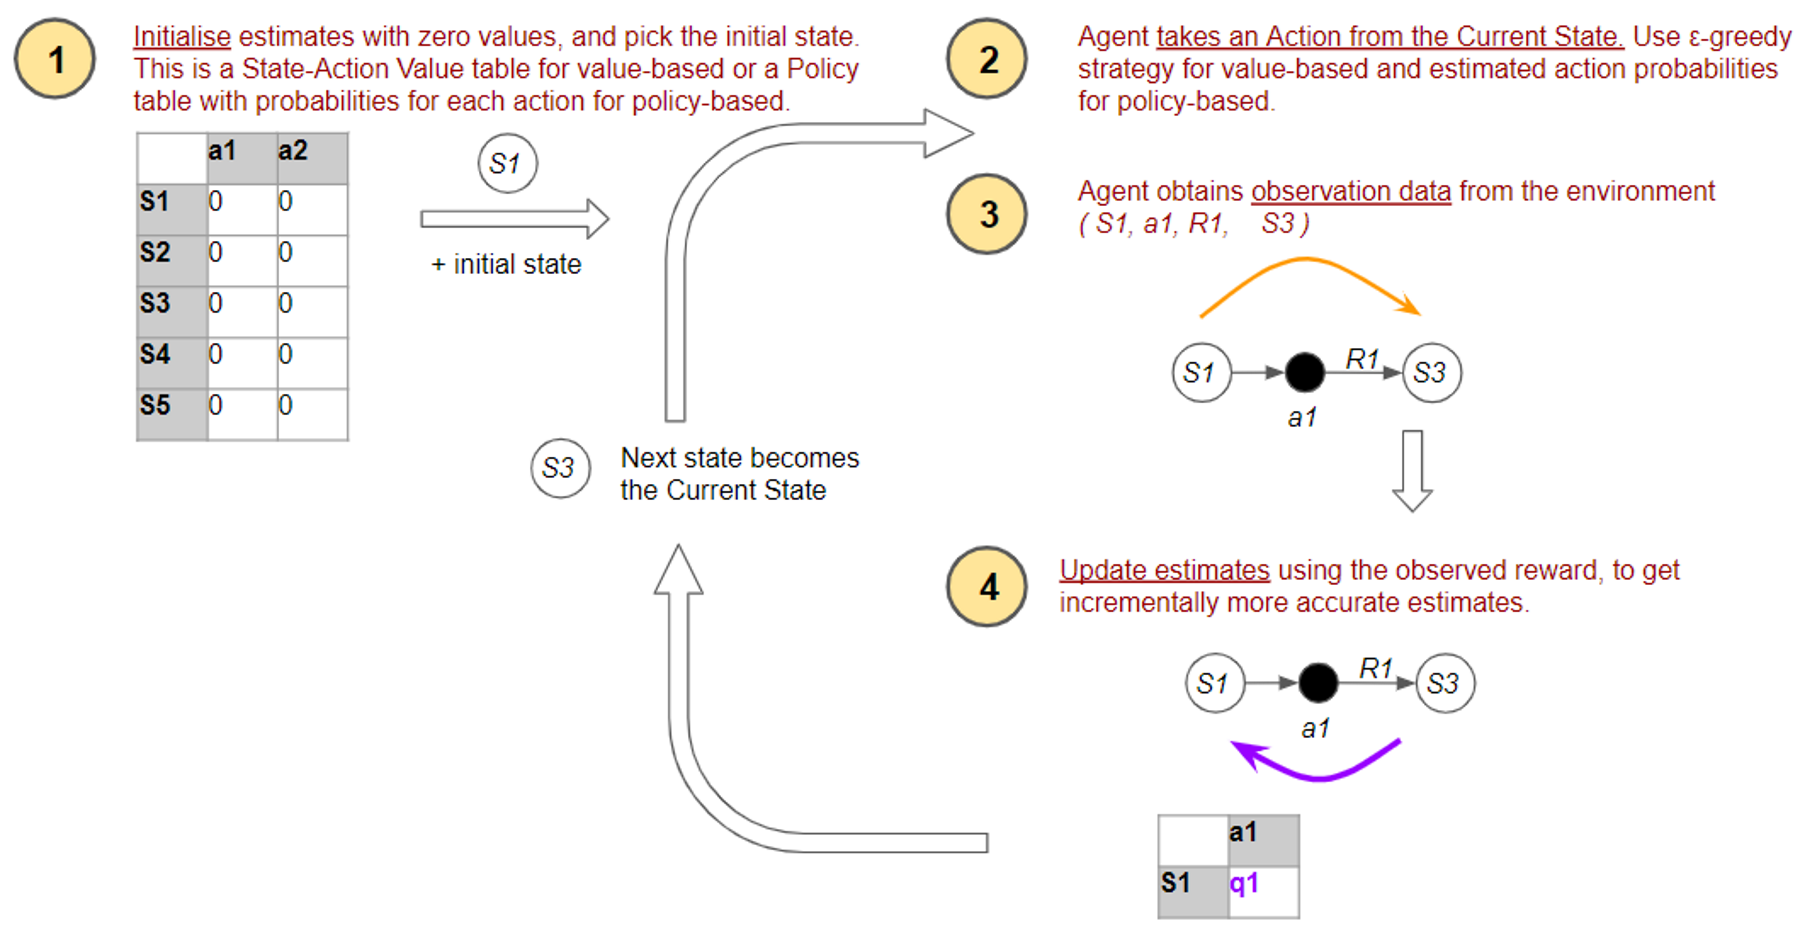

#### Different Ways to Improve Estimates
- Frequency — the number of forward steps taken before an update.
- Depth — the number of backward steps to propagate an update.
- Formula that is used to compute the updated estimate.

##### Frequency
There are three options for the number of forward steps the agent can take before updating our estimates:
        - Episode — The simplest idea is that it takes an action, observes rewards, saves them, then takes another action, observes those rewards and saves them, and keeps doing that till the end of the episode. Finally, at the end of the episode, the algorithm takes all those rewards and uses them to update our estimates.
        - One Step — Alternately, rather than waiting till we go all the way to the end of the episode, we could take just one step, observe those rewards and do the update right away.
        - N Steps — The above two options are the two ends of the spectrum. In between, we could do the update after N steps.

##### Depth
After taking some forward steps, the next question is how far back should the algorithm propagate its update estimates? Again, there are three options:
        - Episode — If the agent took forward steps till the end of the episode, the algorithm could update the estimates for every state-action pair that it took along the way.
        - One Step — Alternately, it could update the estimates for only the current state-action pair.
        - N Steps — The above two options are the two ends of the spectrum. In between, we could update N steps along the way.

##### Update Formula
        - The formula used to update the estimates has many variations eg: Value-based updates use some flavor of the Bellman Equation to update the Q-value with an ‘error’ value. For example, this formula incrementally updates the Q-value estimate with an error value known as the TD Error.
        - Policy-based updates increase or decrease the probability of the action that the agent took, based on whether we received a good reward or not.

#### Relationship between Model-free Algorithms

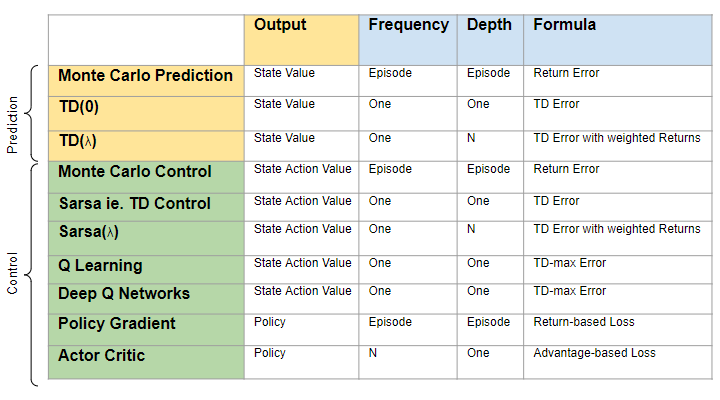


### Q Learning Overview
The Q-learning algorithm uses a Q-table of State-Action Values (also called Q-values). This Q-table has a row for each state and a column for each action. Each cell contains the estimated Q-value for the corresponding state-action pair.
We start by initializing all the Q-values to zero. As the agent interacts with the environment and gets feedback, the algorithm iteratively improves these Q-values until they converge to the Optimal Q-values. It updates them using the Bellman equation.